Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Bruno C. Gonzalez"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Setup

In [84]:
import numpy as np  # For computations
import pandas as pd  # For indexing our data
import datetime
import yfinance as yf

np.random.seed(12345)
import matplotlib.pyplot as plt  # for visualizing our data

plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Downloading Stock Prices

### Using Yahoo Finance `yfinance` library

In [87]:
2+2

4

In [90]:
# I use today date to download the prices.
# I also include here some parameters
companies = ['AMZN','FB', 'MMM', 'IBM']
start = datetime.datetime.today() - datetime.timedelta(365*5)
end = datetime.datetime.today()

In [91]:
prices = {}
for c in companies:
    print(c)
    prices[c] = yf.download(c, start=start)['Adj Close']

AMZN
[*********************100%***********************]  1 of 1 completed
FB
[*********************100%***********************]  1 of 1 completed
MMM
[*********************100%***********************]  1 of 1 completed
IBM
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

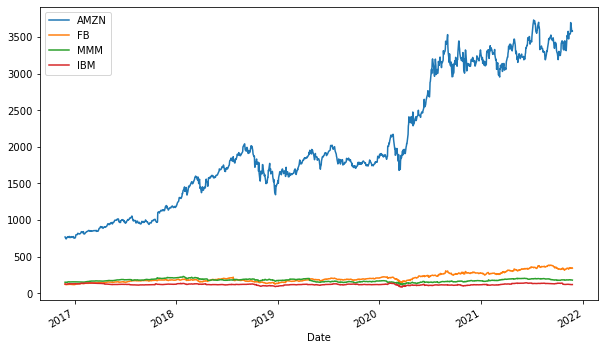

In [98]:
# Dataframe with all prices
pd.DataFrame(prices).plot()

## Resample Data

In [100]:
resam_prices = {}

for p in prices:
    print(p)
    resam_prices[p] = prices[p].asfreq("BM")

AMZN
FB
MMM
IBM


In [101]:
resam_prices['AMZN']

Date
2016-11-30     750.570007
2016-12-30     749.869995
2017-01-31     823.479980
2017-02-28     845.039978
2017-03-31     886.539978
                 ...     
2021-06-30    3440.159912
2021-07-30    3327.590088
2021-08-31    3470.790039
2021-09-30    3285.040039
2021-10-29    3372.429932
Freq: BM, Name: Adj Close, Length: 60, dtype: float64